Desmond Kager
Anne Lightbody 
ESCI 895 
December 7 2021

#### Examining river regulation’s effect on flood frequency between various climates and water resource development types

### Introduction:

   River regulation is the act of controlling river water level or the variability of river flows to meet human demands. Rivers are dammed and channels are rerouted in order to fulfill these demands which vary from flood control and power generation to drinking water supplies and irrigation for agriculture. Dams have a significant impact on rivers, the two most important being limiting the movement of water and sediment downstream. Reduction of flows increases channel stability downstream and limits sediment deposition making dammed rivers geometry relics of the fluvial environment that existed before dam construction. Dams also impact the magnitude and frequency of floods by absorbing many small floods and significantly reducing large ones through reservoir storage. These significant differences between regulated and unregulated rivers impact hydrologists ability to accurately estimate flood size and frequency. Accurately predicting the magnitude and frequency of floods can help city planners build resilient infrastructure that is built in accordance with flood frequency equations that account for river regulation.The goal of this study is to see how similar sized regulated and unregulated rivers flood frequency compare between various climates and water resource development types

### Site description: 

   To demonstrate the effect that regulation has on flood frequency, 4 stream gauges were chosen two with regulation and two without regulation. In order to analyze the effect climate has on flood frequencies two of these sites are located in South Carolina and two in Northern New Hampshire. The first stream gauge I chose is located in the western side of South Carolina on the 200 mile long Saluda River. This river is heavily regulated with dams and is located in an area with substantial industrial agriculture and high waste water release. The second gauge in South Carolina is located in the nearby Reedy River. The Reedy River is a 68 mile long river which eventually joins the Saluda river 9 miles north of Lake Greenwood. I chose the Reedy River because it doesn't have any regulation from dams unlike the Saluda River. The third stream gauge I chose is located on the Connecticut River in Northern New Hampshire. This river is regulated from the Murphy dam which stores water from the first and second Connecticut Lakes. The last stream gauge is located on the Diamond River near Wentworth NH. This river does not have significant regulation affecting streamflow. Both NH gauges are located in rural areas with limited development and human influence.

   Peak annual discharge was obtained from USGS streamflow gauging sites for each of the four stream gauges located in figure 1. 15 minute discharge measurements were also obtained from the USGS streamflow gauging sites in order to construct hydrographs of the specific storm events. Hourly precipitation was acquired from NOAA’s rain gauges in order to analyze how precipitation affects the discharges at the specific stream gauges. Land classification data was obtained through the National Land Cover Database and Hydrologic soil group data was obtained  through the USDA web soil survey. 

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime as dt
import glob 

from PIL import Image

import warnings
warnings.filterwarnings("ignore")

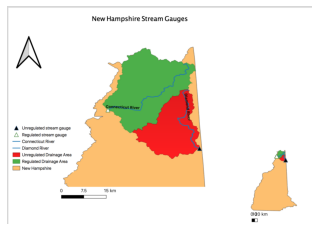

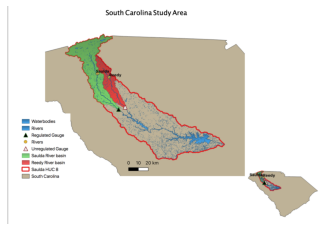

In [2]:
#%% Loads in both site maps 
filelist= ['NH_sites.png','SC_sites.png',]

for imagefile in filelist:
    im=Image.open(imagefile)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

### Reading in Watershed background data 
Reads in land cover data, soil hydrologic group data and prints the mean basin slope data for all the watersheds. 

In [3]:
#%% Reads in watershed data
filenames2 = ['Landcover_data_final.csv','Soil_Data.csv','mean_basin_slope.csv']  
dfland= pd.read_csv(filenames2[0],header=0,index_col=0)

dfsoil= pd.read_csv(filenames2[1],header=0,index_col=0)
 
dfslope= pd.read_csv(filenames2[2],header=0,index_col=0)
print(dfslope) 

                       mean basin slope
Drainage Basin                         
Saluda River                       17.3
Reedy River                         8.1
Diamond River                      17.9
CT River NR Pittsburg              11.8


### Plotting catchment areas based on Landcover and Hydrologic Soil Groups

Each of the four stream gauges delineated watersheds where plotted based on land classification data from the NLCD.  Many of the individual NLCD classifications were combined into a general classification, for example the NLCD categories Evergreen forest, Deciduous forest and Mixed forest were joined to make the class forest in figure1.  Hydraulic Soil groups were also plotted for each of the catchment areas using the USDA four main groups (A, B,C and D) and three dual classes (A/D, B/D and C/D). The goal of plotting hydrologic soil types and land cover classifications was to see if these factors also influence flood frequency of a particular watershed. 


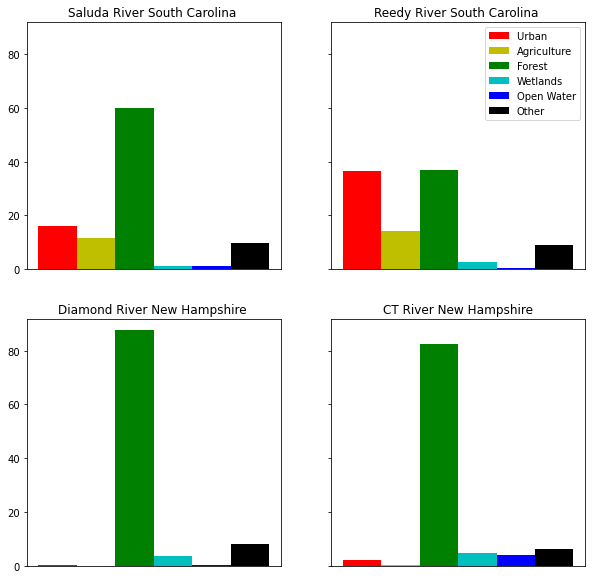

In [4]:
#%% Plots land use 
X= np.arange(1)
fig, ax = plt.subplots(2,2, sharey=True,figsize=(10,10))

ax[0,0].bar(X + 0.00, dfland.iloc[0,0], color = 'r', width = 0.1, label='Urban ')
ax[0,0].bar(X + 0.1, dfland.iloc[0,1], color = 'y', width = 0.1, label= 'Agriculture')
ax[0,0].bar(X + 0.2, dfland.iloc[0,2], color = 'g', width = 0.1, label= 'Forest')
ax[0,0].bar(X + 0.3, dfland.iloc[0,3], color = 'c', width = 0.1, label= 'Wetlands')
ax[0,0].bar(X + 0.4, dfland.iloc[0,4], color = 'b', width = 0.1, label= 'Open Water')
ax[0,0].bar(X + 0.5, dfland.iloc[0,5], color = 'k', width = 0.1, label= 'Other')
ax[0,0].set_title('Saluda River South Carolina ')
ax[0,0].xaxis.set_visible(False)

ax[0,1].bar(X + 0.00, dfland.iloc[1,0], color = 'r', width = 0.1, label='Urban ')
ax[0,1].bar(X + 0.1, dfland.iloc[1,1], color = 'y', width = 0.1, label= 'Agriculture')
ax[0,1].bar(X + 0.2, dfland.iloc[1,2], color = 'g', width = 0.1, label= 'Forest')
ax[0,1].bar(X + 0.3, dfland.iloc[1,3], color = 'c', width = 0.1, label= 'Wetlands')
ax[0,1].bar(X + 0.4, dfland.iloc[1,4], color = 'b', width = 0.1, label= 'Open Water')
ax[0,1].bar(X + 0.5, dfland.iloc[1,5], color = 'k', width = 0.1, label= 'Other')
ax[0,1].set_title('Reedy River South Carolina ')
ax[0,1].xaxis.set_visible(False)

ax[1,0].bar(X + 0.00, dfland.iloc[2,0], color = 'r', width = 0.1, label='Urban ')
ax[1,0].bar(X + 0.1, dfland.iloc[2,1], color = 'y', width = 0.1, label= 'Agriculture')
ax[1,0].bar(X + 0.2, dfland.iloc[2,2], color = 'g', width = 0.1, label= 'Forest')
ax[1,0].bar(X + 0.3, dfland.iloc[2,3], color = 'c', width = 0.1, label= 'Wetlands')
ax[1,0].bar(X + 0.4, dfland.iloc[2,4], color = 'b', width = 0.1, label= 'Open Water')
ax[1,0].bar(X + 0.5, dfland.iloc[2,5], color = 'k', width = 0.1, label= 'Other')
ax[1,0].set_title('Diamond River New Hampshire ')
ax[1,0].xaxis.set_visible(False)

ax[1,1].bar(X + 0.00, dfland.iloc[3,0], color = 'r', width = 0.1, label='Urban ')
ax[1,1].bar(X + 0.1, dfland.iloc[3,1], color = 'y', width = 0.1, label= 'Agriculture')
ax[1,1].bar(X + 0.2, dfland.iloc[3,2], color = 'g', width = 0.1, label= 'Forest')
ax[1,1].bar(X + 0.3, dfland.iloc[3,3], color = 'c', width = 0.1, label= 'Wetlands')
ax[1,1].bar(X + 0.4, dfland.iloc[3,4], color = 'b', width = 0.1, label= 'Open Water')
ax[1,1].bar(X + 0.5, dfland.iloc[3,5], color = 'k', width = 0.1, label= 'Other')
ax[1,1].set_title('CT River New Hampshire')
ax[1,1].xaxis.set_visible(False)
ax[0,1].legend(loc='best')



Figure 1. Land use classifications of the four New Hampshire and South Carolina watersheds.




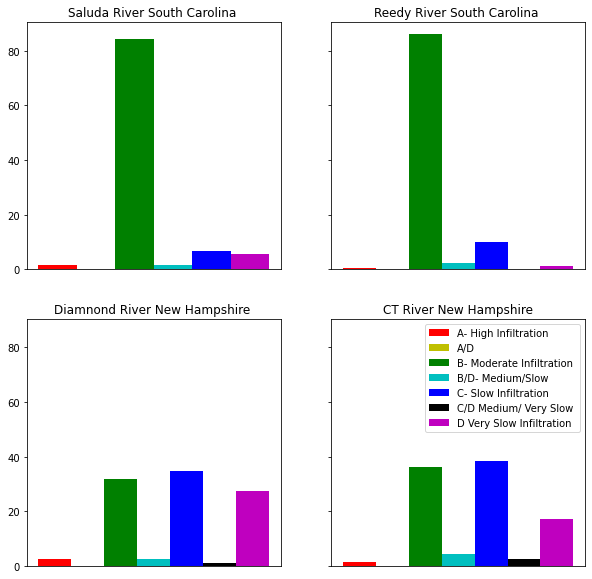

In [5]:
#%% SOIL Types for watersheds 
X= np.arange(1)
fig, ax = plt.subplots(2,2, sharey=True,figsize=(10,10))

ax[0,0].bar(X + 0.00, dfsoil.iloc[0,0], color = 'r', width = 0.1, label='A- High Infiltration ')
ax[0,0].bar(X + 0.1, dfsoil.iloc[0,1], color = 'y', width = 0.1, label= 'A/D')
ax[0,0].bar(X + 0.2, dfsoil.iloc[0,2], color = 'g', width = 0.1, label= 'B- Moderate Infiltration')
ax[0,0].bar(X + 0.3, dfsoil.iloc[0,3], color = 'c', width = 0.1, label= 'B/D- Medium/Slow')
ax[0,0].bar(X + 0.4, dfsoil.iloc[0,4], color = 'b', width = 0.1, label= 'C- Slow Infiltration')
ax[0,0].bar(X + 0.5, dfsoil.iloc[0,5], color = 'k', width = 0.1, label= 'C/D Medium/ Very Slow ')
ax[0,0].bar(X + 0.5, dfsoil.iloc[0,6], color = 'm', width = 0.1, label= 'D Very Slow Infiltration ')
ax[0,0].set_title('Saluda River South Carolina ')
ax[0,0].xaxis.set_visible(False)

ax[0,1].bar(X + 0.00, dfsoil.iloc[1,0], color = 'r', width = 0.1, label='A- High Infiltration ')
ax[0,1].bar(X + 0.1, dfsoil.iloc[1,1], color = 'y', width = 0.1, label= 'A/D')
ax[0,1].bar(X + 0.2, dfsoil.iloc[1,2], color = 'g', width = 0.1, label= 'B- Moderate Infiltration')
ax[0,1].bar(X + 0.3, dfsoil.iloc[1,3], color = 'c', width = 0.1, label= 'B/D- Medium/Slow')
ax[0,1].bar(X + 0.4, dfsoil.iloc[1,4], color = 'b', width = 0.1, label= 'C- Slow Infiltration')
ax[0,1].bar(X + 0.5, dfsoil.iloc[1,5], color = 'k', width = 0.1, label= 'C/D Medium/ Very Slow ')
ax[0,1].bar(X + 0.6, dfsoil.iloc[1,6], color = 'm', width = 0.1, label= 'D Very Slow Infiltration ')
ax[0,1].set_title('Reedy River South Carolina ')
ax[0,1].xaxis.set_visible(False)

ax[1,0].bar(X + 0.00, dfsoil.iloc[2,0], color = 'r', width = 0.1, label='A- High Infiltration ')
ax[1,0].bar(X + 0.1, dfsoil.iloc[2,1], color = 'y', width = 0.1, label= 'A/D')
ax[1,0].bar(X + 0.2, dfsoil.iloc[2,2], color = 'g', width = 0.1, label= 'B- Moderate Infiltration')
ax[1,0].bar(X + 0.3, dfsoil.iloc[2,3], color = 'c', width = 0.1, label= 'B/D- Medium/Slow')
ax[1,0].bar(X + 0.4, dfsoil.iloc[2,4], color = 'b', width = 0.1, label= 'C- Slow Infiltration')
ax[1,0].bar(X + 0.5, dfsoil.iloc[2,5], color = 'k', width = 0.1, label= 'C/D Medium/ Very Slow ')
ax[1,0].bar(X + 0.6, dfsoil.iloc[2,6], color = 'm', width = 0.1, label= 'D Very Slow Infiltration ')
ax[1,0].set_title('Diamnond River New Hampshire ')
ax[1,0].xaxis.set_visible(False)

ax[1,1].bar(X + 0.00, dfsoil.iloc[3,0], color = 'r', width = 0.1, label='A- High Infiltration ')
ax[1,1].bar(X + 0.1, dfsoil.iloc[3,1], color = 'y', width = 0.1, label= 'A/D')
ax[1,1].bar(X + 0.2, dfsoil.iloc[3,2], color = 'g', width = 0.1, label= 'B- Moderate Infiltration')
ax[1,1].bar(X + 0.3, dfsoil.iloc[3,3], color = 'c', width = 0.1, label= 'B/D- Medium/Slow')
ax[1,1].bar(X + 0.4, dfsoil.iloc[3,4], color = 'b', width = 0.1, label= 'C- Slow Infiltration')
ax[1,1].bar(X + 0.5, dfsoil.iloc[3,5], color = 'k', width = 0.1, label= 'C/D Medium/ Very Slow ')
ax[1,1].bar(X + 0.6, dfsoil.iloc[3,6], color = 'm', width = 0.1, label= 'D Very Slow Infiltration ')
ax[1,1].set_title('CT River New Hampshire')
ax[1,1].xaxis.set_visible(False)

ax[1,1].legend(loc='best')



Figure 2. Hydrologic soil groups for each of the New Hampshire and South Carolina watersheds.  

In [6]:
# creates color class
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Loading in Discharge Data 

15 minute discharge was loaded in for both the South Carolina and New Hampshire sites. The NH 15 min discharge were merged to create dfboth. While the 15 min discharge for the SC sites were merged to create dfboth_SC. These dataframes contained 3 different years of data for both regulated and unregulated gauges in there particular watershed. 


In [7]:
#%% Loads in NH 15 min regulated data 4 files 
path = '/Users/desmond/Desktop/UNH final hydrology data/NH_regulated15' 
all_files = glob.glob(path + "/*.txt")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,parse_dates=['20d'],delimiter= '\t',comment='#',  header=1)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame=frame[['20d','14n']]
frame= frame.rename (columns={'20d':'DATE'})
frame=frame.rename(columns={'14n':'discharge_R'})
frame=frame.set_index('DATE')

In [8]:
#%% Loads in NH unregulated 15 min data 
path2 = '/Users/desmond/Desktop/UNH final hydrology data/NH_unregulated15' 
all_files2 = glob.glob(path2 + "/*.txt")

li2 = []

for filename in all_files2:
    df2 = pd.read_csv(filename, parse_dates=['20d'],index_col=None,delimiter= '\t',comment='#',  header=1)
    li2.append(df2)
    
frame2 = pd.concat(li2, axis=0, ignore_index=True)
frame2=frame2[['20d','14n']]
frame2= frame2.rename (columns={'20d':'DATE'})
frame2=frame2.rename(columns={'14n':'discharge_U'})
frame2=frame2.set_index('DATE')
#Merges the data for NH regulated and Unregulated into a singular df

dfboth= pd.merge(frame,frame2, on='DATE', how='outer')
dfboth.sort_index(inplace=True)



In [9]:
#%% Loading South Carolina regulated 15 min discharge 
path3 = '/Users/desmond/Desktop/UNH final hydrology data/SC_regulated15' 
all_files3 = glob.glob(path3 + "/*.txt")

li3 = []
for filename in all_files3:
    df3 = pd.read_csv(filename, index_col=None,parse_dates=['20d'],delimiter= '\t',comment='#',  header=1)
    li3.append(df3)

frame3 = pd.concat(li3, axis=0, ignore_index=True)

frame3=frame3[['20d','14n']]
frame3= frame3.rename (columns={'20d':'DATE'})
frame3=frame3.rename(columns={'14n':'discharge_R'})
frame3=frame3.set_index('DATE')


In [10]:
#%% Loading South Carolina unregulated 15 min discharge 
path4 = '/Users/desmond/Desktop/UNH final hydrology data/SC_unregulated15' 
all_files4 = glob.glob(path4 + "/*.txt")

li4 = []
for filename in all_files4:
    df4 = pd.read_csv(filename, index_col=None,parse_dates=['20d'],delimiter= '\t',comment='#',  header=1)
    li4.append(df4)
    
frame4= pd.concat(li4, axis=0, ignore_index=True)
frame4=frame4[['20d','14n']]
frame4= frame4.rename (columns={'20d':'DATE'})
frame4=frame4.rename(columns={'14n':'discharge_U'})
frame4=frame4.set_index('DATE')

# Merges the data for SC regulated and Unregulated into a singular df
dfboth_SC= pd.merge(frame3,frame4, on='DATE', how='outer')

dfboth_SC.sort_index(inplace=True)


### Loading in Precipitation data 
Both NH and SC precipitation data were read into there respictive dataframes precip_NH and precip_SC. Trace colems where set as NAN's for both sites. Precipitation was linearly interpolated for both sites and hourly precipitation was converted from inches into centimeters. 

In [11]:
#%% Loading IN NH Precip data 
path5 = '/Users/desmond/Desktop/UNH final hydrology data/Precip_NH' 
all_files5 = glob.glob(path5 + "/*.csv")
li5 = []

for filename in all_files5:
    df5 = pd.read_csv(filename, index_col=None,parse_dates=['DATE'],delimiter= ',',comment='#',
                      header=0, na_values=(-9999,'T'))
    li5.append(df5)

precip_NH = pd.concat(li5, axis=0, ignore_index=True)
precip_NH=precip_NH[['DATE','HourlyPrecipitation']]
precip_NH=precip_NH.set_index('DATE')
precip_NH.sort_index(inplace=True)

for col in precip_NH:
    precip_NH[col] = pd.to_numeric(precip_NH[col], errors='coerce')

precip_NH.interpolate(method='linear',inplace = True)
precip_NH.fillna(method = 'ffill',inplace=True)
precip_NH.fillna(method = 'bfill',inplace=True)

precip_NH['precipcm']=precip_NH['HourlyPrecipitation']*2.54


In [12]:
#%% Loading IN SC Precip data 
path6 = '/Users/desmond/Desktop/UNH final hydrology data/Precip_SC' 
all_files6 = glob.glob(path6+ "/*.csv")
li6 = []

for filename in all_files6:
    df6 = pd.read_csv(filename, index_col=None,parse_dates=['DATE'],delimiter= ',',comment='#',
                      header=0, na_values=(-9999,'T'))
    li6.append(df6)

precip_SC = pd.concat(li6, axis=0, ignore_index=True)
precip_SC=precip_SC[['DATE','HourlyPrecipitation']]
precip_SC=precip_SC.set_index('DATE')
precip_SC.sort_index(inplace=True)

for col in precip_SC:
    precip_SC[col] = pd.to_numeric(precip_SC[col], errors='coerce')


precip_SC.interpolate(method='linear',inplace = True)
precip_SC.fillna(method = 'ffill',inplace=True)
precip_SC.fillna(method = 'bfill',inplace=True)
#conver inches to cm

precip_SC['precipcm']=precip_SC['HourlyPrecipitation']*2.54



### Copying and Manipulating dataframes 
Before dataframes are trimmed by storm dates and normalized based on time step and watershed area copies are made for both discharge and precipitation dataframes in all sites. 

In [13]:
#%% Creates copys of dataframes to be used for analysiss 

#creates copy of NH and SC precipitation
precip_NH2= precip_NH.copy()
precip_NH3= precip_NH.copy()
precip_SC2= precip_SC.copy()
precip_SC3= precip_SC.copy()

#Creates copys of NH and SC discharge 
dfboth2= dfboth.copy()
dfboth3= dfboth.copy()
dfboth_SC2= dfboth_SC.copy()
dfboth_SC3= dfboth_SC.copy()

#Creates copy for single storm analysis 
dfq=dfboth.copy()
dfq3= dfboth.copy()
dfp=precip_NH.copy()
#south carolina precip
dfp4= precip_SC.copy()
#south carolina unregulated
dfq5= dfboth_SC.copy()
#regulated sc
dfq6= dfboth_SC.copy()

In [14]:
#%% List containin names of  daily discharge and annual peak flow

filenames = ['peak_regulatedNH.txt','peak_unregulatedNH.txt','peakunregulatedSC.txt','peakregulatedSC.txt']  
dfpeak= pd.read_csv(filenames[0], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])
dfpeak2= pd.read_csv(filenames[1], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])
dfpeak3= pd.read_csv(filenames[2], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])
dfpeak4= pd.read_csv(filenames[3], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])



In [15]:
#%% Sorrting peak data 
#NH unregulated dfpeak
dfpeak=dfpeak.rename(columns={'10d': 'DATE'})
dfpeak=dfpeak.rename(columns={'8s': 'peak_flow'})
dfpeak= dfpeak.set_index('DATE')
dfpeak= dfpeak[['peak_flow']]

#NH dfpeak regulated
dfpeak2=dfpeak2.rename(columns={'10d': 'DATE'})
dfpeak2=dfpeak2.rename(columns={'8s': 'peak_flow'})
dfpeak2= dfpeak2.set_index('DATE')
dfpeak2= dfpeak2[['peak_flow']]

#SC unregulated dfpeaknflow
dfpeak3=dfpeak3.rename(columns={'10d': 'DATE'})
dfpeak3=dfpeak3.rename(columns={'8s': 'peak_flow'})
dfpeak3= dfpeak3.set_index('DATE')
dfpeak3= dfpeak3[['peak_flow']]
dfpeak3= dfpeak3.drop_duplicates()

#SC dfpeak regulated
dfpeak4=dfpeak4.rename(columns={'10d': 'DATE'})
dfpeak4=dfpeak4.rename(columns={'8s': 'peak_flow'})
dfpeak4= dfpeak4.set_index('DATE')
dfpeak4= dfpeak4[['peak_flow']]



### Sorting and converting peak annual discharges for stream gauges 

Each of the four stream gauges' annual peak discharge data was converted to  areal depth in order to account for the differences in watershed sizes. This was accomplished by dividing peak flows by the watershed area and appropriate time step in order to get units of cm/year.  The mean and standard deviation of these flows were taken in order to inspect the initial differences between the watersheds peak discharges.


In [16]:
#%% converting discharge as an aeral depth by dividing by watershed area
watershedarea=  254*2589988.11

watershedarea2=  153*2589988.11

watershedarea3=  240*2589988.11

watershedarea4=  580*2589988.11

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak["peak_flow"] = (dfpeak['peak_flow']*28316*3600*24*365)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak2["peak_flow"] = (dfpeak2['peak_flow']*28316*3600*24*365)/(watershedarea2*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak3["peak_flow"] = (dfpeak3['peak_flow']*28316*3600*24*365)/(watershedarea3*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak4["peak_flow"] = (dfpeak4['peak_flow']*28316*3600*24*365)/(watershedarea4*10000)


In [17]:
#%% mean peaks accounting for area

def average(peak):
   
    mean= peak['peak_flow'].mean()
    print(mean)
    standard_deviation= peak['peak_flow'].std()
    print(standard_deviation)
  
    return peak
print(color.BOLD +"NH average regulated discharge and std  "+ color.END)
average(dfpeak)
print(color.BOLD +"NH average unregulated discharge and std  "+ color.END)
average(dfpeak2)
print(color.BOLD +"SC average unregulated discharge and std  "+ color.END)
average(dfpeak3)
print(color.BOLD +"SC average regulated discharge and std  "+ color.END)
average(dfpeak4)



NH average regulated discharge and std  
429.7778825483807
152.3890207670377
NH average unregulated discharge and std  
1175.1779176632406
408.12681488640084
SC average unregulated discharge and std  
662.0775309995906
338.90552405008106
SC average regulated discharge and std  
559.2653806641096
281.5696234060432


,peak_flow
DATE,
1939-08-18,624.168785
1940-08-13,1224.559712
1941-07-07,297.817678
1942-03-21,493.390564
1943-01-18,909.503087
...,...
2015-12-30,760.891472
2017-04-25,238.373031
2018-02-13,274.634266


In [18]:
#%% Trimming Peak data
startdate1= dt.datetime(1957,1,1)
enddate1= dt.datetime(2019,1,1)

startdate2= dt.datetime(1940,1,1)
enddate2= dt.datetime(2002,1,1)

dfpeak= dfpeak[startdate1:enddate1]
dfpeak2= dfpeak2[startdate1:enddate1]
dfpeak3= dfpeak3[startdate2:enddate2]
dfpeak4= dfpeak4[startdate2:enddate2]

### Estimating annual flood probabilities between watersheds (Weibull)

Peak annual flows were sorted for each of the watersheds in descending order. The Weibull plotting position formula(EP= R/N+1)  was used to calculate the Exceedance probabilities for each of the stream gauges peak flows, where EP is the exceedance probability and R is the rank and N the number of measurements.  The return interval was calculated for each of the stream gauges with the equation (TR= 1/EP), the return interval associated with a particular exceedance probability is its reciprocal. 


In [19]:
#%% Sortting daily peak by peak flow
sorted_daily_peak= dfpeak.sort_values(by= 'peak_flow',   ascending= False)
sorted_daily_peak2= dfpeak2.sort_values(by= 'peak_flow', ascending= False)
sorted_daily_peak3= dfpeak3.sort_values(by= 'peak_flow', ascending= False)
sorted_daily_peak4= dfpeak4.sort_values(by= 'peak_flow', ascending= False)

In [20]:
#%% return period function
def return_period(sorted_peak):

    
    #create new column rank to determine the highest flows 
    sorted_peak['rank']= sorted_peak['peak_flow'].rank( ascending= False, method= 'first')
    #number of years is equal to n
    n= len(sorted_peak)
    #calculate the exceedence probablity 
    sorted_peak['EP']= sorted_peak['rank']/(n+1) 
    #caluclates the return interval
    sorted_peak['TR']= (1/ sorted_peak['EP'])
    
    return sorted_peak

return_period(sorted_daily_peak)
return_period(sorted_daily_peak2)
return_period(sorted_daily_peak3)
return_period(sorted_daily_peak4)


sorted_daily_values= sorted_daily_peak.sort_values(by= 'TR'   )
sorted_daily_values2= sorted_daily_peak2.sort_values(by= 'TR'   )
sorted_daily_values3= sorted_daily_peak3.sort_values(by= 'TR'   )
sorted_daily_values4= sorted_daily_peak4.sort_values(by= 'TR'   )

In [21]:
#%% rank function 
                                            
interp= np.array([2,5,10,25,50,100])

dfinterp= pd.DataFrame(interp, columns= ['Return Period'])
dfinterp2= pd.DataFrame(interp, columns= ['Return Period'])
dfinterp3= pd.DataFrame(interp, columns= ['Return Period'])
dfinterp4= pd.DataFrame(interp, columns= ['Return Period'])

def rank(sorted_peak):
    
    sorted_peak= sorted_peak.sort_values(by= 'rank', ascending= False)
    return sorted_peak

rank(sorted_daily_peak)
rank(sorted_daily_peak2)
rank(sorted_daily_peak3)
rank(sorted_daily_peak4)


,peak_flow,rank,EP,TR
DATE,,,,
1980-10-01,158.122759,62.0,0.984127,1.016129
1970-03-22,168.822795,61.0,0.968254,1.032787
1985-11-30,194.383993,60.0,0.952381,1.050000
1988-01-21,207.461815,59.0,0.936508,1.067797
1999-02-02,208.056262,58.0,0.920635,1.086207
...,...,...,...,...
1964-04-08,992.725592,5.0,0.079365,12.600000
1963-03-06,1046.225773,4.0,0.063492,15.750000
1940-08-13,1224.559712,3.0,0.047619,21.000000


### Estimating annual flood probabilities between watersheds (Log Pearson III )

The log Pearson III was also used to predict annual flood probabilities by using the previously log transformed mean, standard deviation and the estimated skew.  The equation is the mean + standard deviation * KgEP(frequency factor).  Skew of 0 was used for South Carolina and .3 for New Hampshire based on the USGS generalized skew coefficients map. The log was reversed to obtain discharge measurements The log pearson III is useful because it can be used to estimate floods well beyond the observed flood events.


In [22]:
#%% Interp function 

def interp(df_interp,sorted_peak,peak):
    
    df_interp['interp_values']= np.interp(df_interp['Return Period'], sorted_peak['TR'],
                                       sorted_peak['peak_flow'])
    #log transformed data  3.1
    peak['log10']= np.log10(peak['peak_flow'])
    # 3.3 log means 
    mean_log= peak['log10'].mean()
    print('mean log is' +str(mean_log))
    #calculates standard deviation of peak flow log
    standard_deviation_log= peak['log10'].std()
    print('standard deviation log is' +str(standard_deviation_log))
    #adds the EP to the dfinterp column 
    df_interp['EP']= 1/df_interp['Return Period']
    #calculates the log normal frequncy factor and add kep to interp
    df_interp['Kep']= ((1-df_interp['EP'])**.135-(df_interp['EP'])**.135)/.1975

    #equation 4 log discharge and add to dfinterp
    df_interp['logQp']= peak['log10'].mean() +peak['log10'].std()*df_interp['Kep']

    #calculated for the dfinterp dataframe
    df_interp['est discharge logQp']=10**(df_interp['logQp'])
    
    return df_interp
print('NH Regulated')
interp(dfinterp,sorted_daily_values,dfpeak)
print('NH Unregulated')
interp(dfinterp2,sorted_daily_values2,dfpeak2)
print('SC Unregulated')
interp(dfinterp3,sorted_daily_values3,dfpeak3)
print(' SC Regulated')
interp(dfinterp4,sorted_daily_values4,dfpeak4)

NH Regulated
mean log is2.60492976320539
standard deviation log is0.1474310601037865
NH Unregulated
mean log is3.042515907578134
standard deviation log is0.15331995074740895
SC Unregulated
mean log is2.767085913277702
standard deviation log is0.22768539375467156
 SC Regulated
mean log is2.7069864466729854
standard deviation log is0.22304234854500013


,Return Period,interp_values,EP,Kep,logQp,est discharge logQp
0,2,560.496964,0.50,0.000000,2.706986,509.314976
1,5,786.367748,0.20,0.838559,2.894021,783.466998
2,10,957.058804,0.10,1.281278,2.992766,983.480562
3,25,1226.824270,0.04,1.756694,3.098804,1255.462020
4,50,1237.486564,0.02,2.063623,3.167262,1469.812124
5,100,1242.393106,0.01,2.337278,3.228298,1691.602563


In [23]:
#%% GSX function 
def gsx(interp,peak):
    
    # section 4.2 gsx equation 
    N=len(interp)
    gsx= (N*sum((peak['log10']
                            -peak['log10'].mean())**3)/((N-1)*(N-2)*peak['log10'].mean()**3))
    print('gsx='+ str(gsx))
    
    #calculate the  mean square error of station skew
    print('regional skew is .3')
    #based on USGS regional skew map 
    grx= .3
    #equations based on gsx values for mean square error 
    a= -.33 +.08+gsx
    b= .94 -.26 +gsx
    
    MSEgsx= (10**(a+b)/N**b)
    print('MSEgsx='+ str(MSEgsx))
    #given mean square error regional skew 
    MSEgrx= .302
    #the minimum mean square error weighted skew estimate
    gx= ((gsx/MSEgsx)+(grx/MSEgrx))/((1/MSEgsx)+(1/MSEgrx))
    print('gx=' +str(gx))
    #frequency factor kg exceedence probablity
    interp['Kg']= (2/gx)*(1+gx*((((1-interp['EP'])**.135)-
                      interp['EP']**.135)/1.185) - ((gx/36)**2))**3 - (2/gx)
    #equation 5 log discharge and add to dfinterp
    interp['lognew']= peak['log10'].mean() +peak['log10'].std()*interp['Kg']
    
    #calculated for the dfinterp dataframe
    interp['lognew']=10**(interp['lognew'])
    
    return interp

print(color.BOLD +"NH Regulated   "+ color.END)
gsx(dfinterp,dfpeak)
print(color.BOLD +"NH Unregulated   "+ color.END)
gsx(dfinterp2,dfpeak2)


NH Regulated   
gsx=0.0006869023269967602
regional skew is .3
MSEgsx=0.7974371065290259
gx=0.21778287729198034
NH Unregulated   
gsx=-0.00048392921199591867
regional skew is .3
MSEgsx=0.7948146463800269
gx=0.2172639179085316


,Return Period,interp_values,EP,Kep,logQp,est discharge logQp,Kg,lognew
0,2,1113.064769,0.50,0.000000,3.042516,1102.848629,-0.001006,1102.457093
1,5,1478.375215,0.20,0.838559,3.171084,1482.804159,0.863212,1495.765550
2,10,1806.521503,0.10,1.281278,3.238961,1733.650073,1.340542,1770.303861
3,25,1919.194362,0.04,1.756694,3.311852,2050.463908,1.869671,2133.898249
4,50,2514.285903,0.02,2.063623,3.358911,2285.127960,2.220507,2415.260273
5,100,2884.425186,0.01,2.337278,3.400867,2516.907158,2.539489,2703.150488


In [24]:
#%% GSX2 function 
def gsx2(interp,peak):
    
    # section 4.2 gsx equation 
    N=len(interp)
    gsx= (N*sum((peak['log10']
                            -peak['log10'].mean())**3)/((N-1)*(N-2)*peak['log10'].mean()**3))
    print('gsx='+ str(gsx))
    
    #calculate the  mean square error of station skew
    print('regional skew is 0')
    #based on USGS regional skew map 
    grx= 0
    #equations based on gsx values for mean square error 
    a= -.33 +.08+gsx
    b= .94 -.26 +gsx
    
    MSEgsx= (10**(a+b)/N**b)
    print('MSEgsx='+ str(MSEgsx))
    #given mean square error regional skew 
    MSEgrx= .302
    #the minimum mean square error weighted skew estimate
    gx= ((gsx/MSEgsx)+(grx/MSEgrx))/((1/MSEgsx)+(1/MSEgrx))
    print('gx=' +str(gx))
    #frequency factor kg exceedence probablity
    interp['Kg']= (2/gx)*(1+gx*((((1-interp['EP'])**.135)-
                      interp['EP']**.135)/1.185) - ((gx/36)**2))**3 - (2/gx)
    #equation 5 log discharge and add to dfinterp
    interp['lognew']= peak['log10'].mean() +peak['log10'].std()*interp['Kg']
    
    #calculated for the dfinterp dataframe
    interp['lognew']=10**(interp['lognew'])
    
    return interp

print(color.BOLD +"SC Unregulated   "+ color.END)
gsx2(dfinterp3,dfpeak3)
print(color.BOLD +"SC Regulated   "+ color.END)
gsx2(dfinterp4,dfpeak4)


SC Unregulated   
gsx=-0.0013133649268366532
regional skew is 0
MSEgsx=0.7929620743334185
gx=-0.0003622373936066507
SC Regulated   
gsx=-0.004460592301073262
regional skew is 0
MSEgsx=0.7859718297007566
gx=-0.0012381744068636783


,Return Period,interp_values,EP,Kep,logQp,est discharge logQp,Kg,lognew
0,2,560.496964,0.50,0.000000,2.706986,509.314976,0.000006,509.316476
1,5,786.367748,0.20,0.838559,2.894021,783.466998,0.838420,783.410921
2,10,957.058804,0.10,1.281278,2.992766,983.480562,1.280945,983.312371
3,25,1226.824270,0.04,1.756694,3.098804,1255.462020,1.756063,1255.055219
4,50,1237.486564,0.02,2.063623,3.167262,1469.812124,2.062750,1469.153318
5,100,1242.393106,0.01,2.337278,3.228298,1691.602563,2.336156,1690.628593


### Plotting annual peak discharge vs return periods 
Both the NH and SC return intervals were plotted against the sorted annual peak discharges. The log Pearson III extrapolations where plotted as well with dfinterp return periods being plotted against the lognew thus creating the two figures bellow (figure 3 and 4).



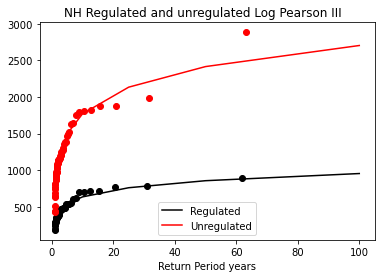

In [25]:
#%% NH Plotting 
fig,(ax4)= plt.subplots(1,1)
ax4.set_title('NH Regulated and unregulated Log Pearson III  ')
#plots the measured peak discharge values 
ax4.plot(sorted_daily_peak['TR'],sorted_daily_peak['peak_flow'],'o', color= 'k')
                    
ax4.set_xlabel('Return Period years')
#plot log pearson 3
ax4.plot(dfinterp['Return Period'], dfinterp['lognew'], color= 'k', label= 'Regulated')
ax4.legend(loc='lower center')
#plots the measured peak discharge values 
ax4.plot(sorted_daily_peak2['TR'],sorted_daily_peak2['peak_flow'],'o', color= 'r')
ax4.set_xlabel('Return Period years')

ax4.plot(dfinterp2['Return Period'], dfinterp2['lognew'], color= 'r', label= 'Unregulated')

ax4.legend(loc='lower center')

plt.show()

Figure 3. New Hampshire regulated and unregulated annual peak discharge vs return periods with trend lines depiciting log pearson III extrapolations.

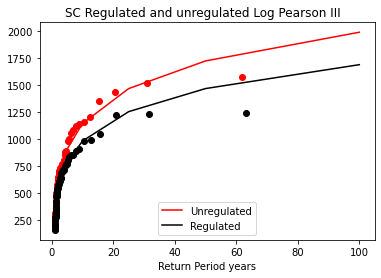

In [26]:
#%% SC plotting 
fig,(ax5)= plt.subplots(1,1)
ax5.set_title('SC Regulated and unregulated Log Pearson III  ')
ax5.plot(sorted_daily_peak3['TR'],sorted_daily_peak3['peak_flow'],'o', color= 'r')
ax5.set_xlabel('Return Period years')

ax5.plot(dfinterp3['Return Period'], dfinterp3['lognew'], color= 'r', label= 'Unregulated')
#plots the measured peak discharge values 
ax5.plot(sorted_daily_peak4['TR'],sorted_daily_peak4['peak_flow'],'o', color= 'k')
                    
ax5.set_xlabel('Return Period years')

#plot log pearson 3
ax5.plot(dfinterp4['Return Period'], dfinterp4['lognew'], color= 'k', label= 'Regulated')
ax5.legend(loc='lower center')

ax5.legend(loc='lower center')

plt.show()

Figure 4. South Carolina regulated and unregulated annual peak discharge vs return periods with trend lines depicting log pearson III extrapolations. 


### Plotting storm events 

Six storm events were chosen, three for the NH gauges and three for the SC gauges. 
Regulated and unregulated precipitation were plotted with a shared inverted y axis containing precipitation data. These plots provided a visual of how the rivers reacted to precipitation. 


In [27]:
#%% Dates for each storm

#need it to run through each storm 
startdate_1= (dt.datetime(2019,10,7))
enddate_1= (dt.datetime(2019,10,10))

startdate_2= (dt.datetime(2011,5,26))
enddate_2= (dt.datetime(2011,5,30))

startdate_3= (dt.datetime(2005,10,14))
enddate_3= (dt.datetime(2005,10,19))

startdate_4= (dt.datetime(1990,10,22))
enddate_4= (dt.datetime(1990,10,27))

startdate_5= (dt.datetime(1998,3,7))
enddate_5= (dt.datetime(1998,3,14))

startdate_6= (dt.datetime(1995,8,26))
enddate_6= (dt.datetime(1995,9,1))

In [28]:
# Convert discharge data from ft^3/s to cm/hr regulated SC
dfboth_SC["discharge_R"] = (dfboth_SC['discharge_R']*28316*3600)/(watershedarea4*10000)

# Convert discharge data from ft^3/s to cm/hr regulated SC
dfboth_SC["discharge_U"] = (dfboth_SC['discharge_U']*28316*3600)/(watershedarea3*10000)

# Convert discharge data from ft^3/s to cm/hr regulated SC
dfboth_SC2["discharge_R"] = (dfboth_SC2['discharge_R']*28316*3600)/(watershedarea4*10000)

# Convert discharge data from ft^3/s to cm/hr regulated SC
dfboth_SC2["discharge_U"] = (dfboth_SC2['discharge_U']*28316*3600)/(watershedarea3*10000)

# Convert discharge data from ft^3/s to cm/hr regulated SC
dfboth_SC3["discharge_R"] = (dfboth_SC3['discharge_R']*28316*3600)/(watershedarea4*10000)

# Convert discharge data from ft^3/s to cm/hr regulated SC
dfboth_SC3["discharge_U"] = (dfboth_SC3['discharge_U']*28316*3600)/(watershedarea3*10000)



# Convert discharge data from ft^3/s to cm/hr regulated NH
dfboth["discharge_R"] = (dfboth['discharge_R']*28316*3600)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfboth["discharge_U"] = (dfboth['discharge_U']*28316*3600)/(watershedarea2*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfboth2["discharge_R"] = (dfboth2['discharge_R']*28316*3600)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfboth2["discharge_U"] = (dfboth2['discharge_U']*28316*3600)/(watershedarea2*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfboth3["discharge_R"] = (dfboth3['discharge_R']*28316*3600)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfboth3["discharge_U"] = (dfboth3['discharge_U']*28316*3600)/(watershedarea2*10000)

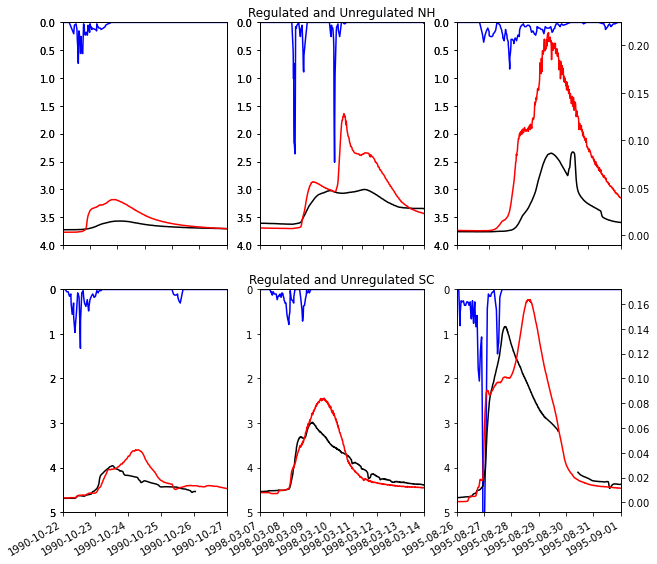

In [29]:
#%% Time series plot for 6 storms


#creates plotting function that does plotting for all  NH timeseries 
def timeseriesplot(dfboth,dfboth2,dfboth3,dfboth_SC,dfboth_SC2,dfboth_SC3,
                   precip_NH,precip_NH2,precip_NH3,precip_SC,precip_SC2,precip_SC3,
                   startdate_1,enddate_1,startdate_2,enddate_2,startdate_3,enddate_3,
                   startdate_4,enddate_4,startdate_5,enddate_5,startdate_6,enddate_6):
    
    fig, ax = plt.subplots(2,3, figsize=(10,10))
    
    ax[0,0].set_ylim(bottom= 0, top=4)
    ax[0,0].invert_yaxis()
    ax[0,0]= ax[0,0].twinx()
    
    ax[0,1].set_ylim(bottom= 0, top=4)
    ax[0,1].invert_yaxis()
    ax[0,1]= ax[0,1].twinx()
    
    ax[0,2].set_ylim(bottom= 0, top=4)
    ax[0,2].invert_yaxis()
    ax[0,2]= ax[0,2].twinx()
    #ax[0,0].set_ylabel('Discharge (mm/day)', color='r') 
                           
    ax[0,0].plot(precip_NH['precipcm'], color = 'b', linestyle = '-', label = 'precip')
    #ax[0,0].set_title('RegulatedNH')
    
    ax[0,1].plot(precip_NH2['precipcm'], color = 'b', linestyle = '-', label = 'precip')
    #ax[0,1].set_title('RegulatedNH')
    
    ax[0,2].plot(precip_NH3['precipcm'], color = 'b', linestyle = '-', label = 'precip')
    #ax[0,2].set_title('RegulatedNH')
    
    ax[0,0].set_ylim(bottom= 0, top=4)
    ax[0,0].invert_yaxis()
    ax[0,0]= ax[0,0].twinx()
    
    ax[0,1].set_ylim(bottom= 0, top=4)
    ax[0,1].invert_yaxis()
    ax[0,1]= ax[0,1].twinx()
    
    
    ax[0,2].set_ylim(bottom= 0, top=4)
    ax[0,2].invert_yaxis()
    ax[0,2]= ax[0,2].twinx()

    ax[0,0].plot(dfboth['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
   # ax[0,0].set_title('RegulatedNH')
    
    ax[0,0].plot(dfboth['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[0,0].set_title('UnregulatedNH')
    
    ax[0,1].plot(dfboth2['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    ax[0,1].set_title('Regulated and Unregulated NH')
   
    ax[0,1].plot(dfboth2['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[0,1].set_title('UnregulatedNH')
    
    ax[0,2].plot(dfboth3['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    #ax[0,2].set_title('RegulatedNH')
 
    ax[0,2].plot(dfboth3['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    
    #South Carolina PLots
    ax[1,0].set_ylim(bottom= 0, top=5)
    ax[1,0].invert_yaxis()
    ax[1,0]= ax[1,0].twinx()
   
 
    ax[1,0].plot(precip_SC['precipcm'], color = 'blue', linestyle = '-', label = 'precip')
    #ax[1,0].set_title('Regulated SC')
    
    
    ax[1,1].plot(precip_SC2['precipcm'], color = 'blue', linestyle = '-', label = 'precip')
    #ax[1,1].set_title('Unregulated SC')
    
     
    ax[1,2].plot(precip_SC3['precipcm'], color = 'blue', linestyle = '-', label = 'precip')
    #ax[1,2].set_title('Unregulated SC')
    
    ax[1,0].set_ylim(bottom= 0, top=5)
    ax[1,0].invert_yaxis()
    ax[1,0]= ax[1,0].twinx()
     
    ax[1,1].set_ylim(bottom= 0, top=5)
    ax[1,1].invert_yaxis()
    ax[1,1]= ax[1,1].twinx()
 

    ax[1,2].set_ylim(bottom= 0, top=5)
    ax[1,2].invert_yaxis()
    ax[1,2]= ax[1,2].twinx()
    
    
    
    ax[1,0].plot(dfboth_SC['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    #ax[1,0].set_title('Regulated SC')
    
    ax[1,0].plot(dfboth_SC['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[1,0].set_title('Regulated SC')

    ax[1,1].plot(dfboth_SC2['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    ax[1,1].set_title('Regulated and Unregulated SC')
    
    ax[1,1].plot(dfboth_SC2['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[1,1].set_title('Regulated SC')
    
    ax[1,2].plot(dfboth_SC3['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    #ax[1,2].set_title('Unregulated SC')
    
    ax[1,2].plot(dfboth_SC3['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    
    #ax[1,2].set_title('Regulated SC')
    ax[0,0].yaxis.set_visible(False)
    ax[0,1].yaxis.set_visible(False)
    ax[0,1].xaxis.set_visible(False)
    
    ax[1,0].yaxis.set_visible(False)
    ax[1,1].yaxis.set_visible(False)
    ax[1,1].xaxis.set_visible(False)
    
    
    #ax[0,2].yaxis.set_visible(False)

    ax[0,0].set_xlim(startdate_1,enddate_1)
    ax[0,1].set_xlim(startdate_2,enddate_2)
    ax[0,2].set_xlim(startdate_3,enddate_3)
    #fig.autofmt_xdate()
    ax[1,0].set_xlim(startdate_4,enddate_4)
    #fig.autofmt_xdate()
    ax[1,1].set_xlim(startdate_5,enddate_5)
    #fig.autofmt_xdate()
    ax[1,2].set_xlim(startdate_6,enddate_6)
    
    fig.autofmt_xdate()
timeseriesplot(dfboth,dfboth2,dfboth3,dfboth_SC,dfboth_SC2,dfboth_SC3,
               precip_NH,precip_NH2,precip_NH3,precip_SC,precip_SC2,precip_SC3,
               startdate_1,enddate_1,startdate_2,enddate_2,startdate_3,enddate_3,
               startdate_4,enddate_4,startdate_5,enddate_5,startdate_6,enddate_6)    


Figure 5. New Hampshire and South Carolina storm event hydrographs with precipitation plotted on the inverted y axis. 

### Hydrograph Separation and Analyzing storms 

Hydrosep function was created to calculate the antecedent discharge, event duration, ending discharge, baseflow and each of the dates associated with time of rise and fall. Another function was created to calculate each storm's precipitation, discharge antecedent discharge, maximum precipitation intensity, peak event discharge, duration of water input and centroid lag to peak. 

In [30]:
#%% CONVERSIONS BEFORE PLOTTING
# Convert precip from in/hr --> cm/hr
dfp['precip(cm/hr)'] = (dfp['HourlyPrecipitation'] * 2.54)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfq["discharge(cm/hr)"] = (dfq['discharge_R']*28316*3600)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfq3["discharge(cm/hr)"] = (dfq3['discharge_U']*28316*3600)/(watershedarea2*10000)

# Convert discharge data from ft^3/s to cm/hr unregulated SC
dfq5["discharge(cm/hr)"] = (dfq5['discharge_U']*28316*3600)/(watershedarea3*10000)

# Convert precip from in/hr --> cm/hr sc
dfp4['precip(cm/hr)'] = (dfp4['HourlyPrecipitation'] * 2.54)

# Convert discharge data from ft^3/s to cm/hr regulated SC
dfq6["discharge(cm/hr)"] = (dfq6['discharge_R']*28316*3600)/(watershedarea4*10000)


In [31]:
#%% Dates to run through 
#creates df of storms to look at
date= {'startdates': [dt.datetime(2019,10,7),dt.datetime(2011,5,26),dt.datetime(2005,10,14)],
       'enddates':[dt.datetime(2019,10,10),dt.datetime(2011,5,30),dt.datetime(2005,10,19)]}
dfstorm= pd.DataFrame(data=date)

#creates df of storms to look at
date= {'startdates': [dt.datetime(2019,10,7),dt.datetime(2011,5,26),dt.datetime(2005,10,14)],
       'enddates':[dt.datetime(2019,10,10),dt.datetime(2011,5,30),dt.datetime(2005,10,19)]}
dfstorm2= pd.DataFrame(data=date)

#creates df of storms to look at
date= {'startdates': [dt.datetime(1990,10,22),dt.datetime(1998,3,7),dt.datetime(1995,8,26)],
       'enddates':[dt.datetime(1990,10,26),dt.datetime(1998,3,14),dt.datetime(1995,9,1)]}
dfstorm3= pd.DataFrame(data=date)

#creates df of storms to look at
date= {'startdates': [dt.datetime(1990,10,22),dt.datetime(1998,3,7),dt.datetime(1995,8,26)],
       'enddates':[dt.datetime(1990,10,26),dt.datetime(1998,3,14),dt.datetime(1995,9,1)]}
dfstorm4= pd.DataFrame(data=date)


In [32]:
#%% Hydrosep function 

def hydrosep(totalq):

    #  totalq 
    totalq['diff'] = totalq['discharge(cm/hr)'].diff()
    
    # antecedent discharge 
    antQ = (totalq.loc[totalq['diff'] > 0.0001, 'discharge(cm/hr)'])
    antQ_date = antQ.index[0]
    antQ_val = round(antQ[0],3)
    
  
    peakQ_date = totalq['discharge(cm/hr)'].idxmax()
    peakQ = totalq['discharge(cm/hr)'].max()
    
    
    # Calculate event duration
    N = 0.82*(watershedarea*1e-6)**0.2
    
    end_of_event = peakQ_date + dt.timedelta(days = N)
   
    #  discharge nearest to the end of storm event
    ending_discharge = totalq.iloc[totalq.index.get_loc(end_of_event,method='nearest'),1]
    
    
    baseq = totalq[['discharge(cm/hr)']].copy()
    
    # line of best fit for discharge before antecedent date
    slope1,intercept1 = np.polyfit(totalq.loc[totalq.index<antQ_date].index.view('int64')/1e9,
                                   totalq.loc[totalq.index<antQ_date, "discharge(cm/hr)"],1)
    
    
    #  function to estimate baseflow from antecedent date to peak date
    baseq.loc[antQ_date:peakQ_date,"discharge(cm/hr)"] = slope1*(totalq.loc[antQ_date:peakQ_date].index.view('int64')/1e9) + intercept1
    
    # line of best fit for discharge between peak date and end of event
    slope2,intercept2 = np.polyfit([peakQ_date.timestamp(),end_of_event.timestamp()],
                                   [baseq.loc[peakQ_date,"discharge(cm/hr)"],ending_discharge],1)
    
    # function  estimates baseflow from peak date to end of event 
    baseq.loc[peakQ_date:end_of_event,"discharge(cm/hr)"] = slope2*(totalq.loc[peakQ_date:end_of_event].index.view('int64')/1e9) + intercept2

    return (baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge)

# for loop for storms 
for i, v in dfstorm.iterrows():
    
    storm_start = dfstorm.loc[i,'startdates']
    storm_end = dfstorm.loc[i,'enddates']

    try:
        baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq[storm_start:storm_end])
        baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq3[storm_start:storm_end])
    
    except:
        baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq5[storm_start:storm_end])
        baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq6[storm_start:storm_end])


In [33]:
#%% Analyze storm function 

def analyzestorm(df, dfp, dfq):

    # Columns to be added to dfstorm
    column_names = ['Total precipitation (cm)', 'Total discharge (cm)','Antecedent discharge (cm/hr)',
                    'Maximum precipitation intensity (cm/hr)','Peak event discharge (cm/hr)', 
                    'Duration of water input (days)', 'Centroid lag to peak (days)']


    df[column_names] = 0    

    for i, v in df.iterrows():
        
        
        dfp2 = dfp[df.loc[i,'startdates']:df.loc[i,'enddates']]
        dfq2 = dfq[df.loc[i,'startdates']:df.loc[i,'enddates']]
        
        # Print storm number should be totla of 6 labeld 1 2 and 3 
        print("\nStorm " + str(i+1))
        
        # Total precipitation 
        total_precip = dfp2['precip(cm/hr)'].sum()
        print("\nTotal precipitation (cm) : " + str(total_precip))
        df.loc[i,'Total precipitation (cm)'] = total_precip
        
    
        # Total discharge 
        total_discharge =  dfq2['discharge(cm/hr)'].sum()
        print("Total discharge (cm) : " + str(total_discharge))
        df.loc[i,'Total discharge (cm)'] = total_discharge
        
    
        baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq2)
        
        # Antecedent discharge 
        print("Antecedent discharge (cm/hr): " + str(antQ_val))
        df.loc[i,'Antecedent discharge (cm/hr)'] = antQ_val
        
        # Maximum precipitation 
        max_precip = dfp['precip(cm/hr)'].max()
        print("Maximum precipitation intensity (cm/hr): " + str(max_precip))
        df.loc[i,'Maximum precipitation intensity (cm/hr)'] = max_precip
        
        # Peak event discharge 
        print("Peak event discharge (cm/hr): " + str(peakQ))
        print("Time of peak event: " + str(peakQ_date))
        df.loc[i,'Peak event discharge (cm/hr)'] = peakQ
   
        #  Seconds column in dfp2 
        dfp2['seconds'] = dfp2.index.view('int64')/1e9
        
        #  Centroid of precipitation event 
        centroid = (dfp2['precip(cm/hr)']*dfp2['seconds']).sum()/(dfp2['precip(cm/hr)'].sum())
        centroid = dt.datetime.fromtimestamp(centroid)
        print("Centroid: " + str(centroid))
        
        # Lag time 
        lagtime = peakQ_date-centroid
        day_remainder = (lagtime.seconds)/86400
        lagtime = lagtime.days + day_remainder
        print("Lag time (days): " + str(lagtime))
        df.loc[i,'Centroid lag to peak (days)'] = lagtime
        

    
    return (total_precip, total_discharge,baseq,antQ_date,antQ_val,peakQ_date,
            peakQ,end_of_event,ending_discharge,
            centroid,lagtime,df)
print(color.BOLD +"NH Regulated Storms  "+ color.END)
analyzestorm(dfstorm, dfp, dfq) 
print(color.BOLD +"NH Unregulated Storms "+ color.END)
analyzestorm(dfstorm2, dfp, dfq3) 
print(color.BOLD +"SC Unregulated Storms "+ color.END)
analyzestorm(dfstorm3, dfp4, dfq5) 
print(color.BOLD +"SC Regulated Storms "+ color.END)
analyzestorm(dfstorm4, dfp4, dfq6)

NH Regulated Storms  

Storm 1

Total precipitation (cm) : 11.5824
Total discharge (cm) : 2.7732280367784403
Antecedent discharge (cm/hr): 0.007
Maximum precipitation intensity (cm/hr): 3.7846
Peak event discharge (cm/hr): 0.015139010185630837
Time of peak event: 2019-10-08 01:00:00
Centroid: 2019-10-07 05:15:22.675439
Lag time (days): 0.822650462962963

Storm 2

Total precipitation (cm) : 37.18306
Total discharge (cm) : 12.196866744519173
Antecedent discharge (cm/hr): 0.012
Maximum precipitation intensity (cm/hr): 3.7846
Peak event discharge (cm/hr): 0.04834566200528988
Time of peak event: 2011-05-28 13:15:00
Centroid: 2011-05-27 01:38:03.375914
Lag time (days): 1.4839814814814813

Storm 3

Total precipitation (cm) : 27.305
Total discharge (cm) : 14.631969559945873
Antecedent discharge (cm/hr): 0.006
Maximum precipitation intensity (cm/hr): 3.7846
Peak event discharge (cm/hr): 0.08785894345192104
Time of peak event: 2005-10-17 13:00:00
Centroid: 2005-10-15 17:52:52.727708
Lag time (da

(58.8772,
 28.862330081267945,
                      discharge(cm/hr)
 DATE                                 
 1995-08-26 00:00:00          0.003895
 1995-08-26 00:15:00          0.003895
 1995-08-26 00:30:00          0.003895
 1995-08-26 00:45:00          0.003895
 1995-08-26 01:00:00          0.003895
 ...                               ...
 1995-08-31 23:00:00          0.014522
 1995-08-31 23:15:00          0.014522
 1995-08-31 23:30:00          0.014522
 1995-08-31 23:45:00          0.014590
 1995-09-01 00:00:00          0.014658
 
 [577 rows x 1 columns],
 Timestamp('1995-08-26 13:00:00'),
 0.005,
 Timestamp('1995-08-27 18:15:00'),
 0.14182569701662345,
 Timestamp('1995-08-30 18:18:10.396049'),
 925.0,
 datetime.datetime(1995, 8, 26, 18, 28, 58, 541847),
 0.9902893518518519,
   startdates   enddates  Total precipitation (cm)  Total discharge (cm)  \
 0 1990-10-22 1990-10-26                 12.966700              2.783713   
 1 1998-03-07 1998-03-14                 20.209933         

### Plotting centroid lag to peak

Two bar graphs were created from the previously calculated centroid lag to peak times for each of the regulated and unregulated storms. Each storm event was plotted adjacent to one another to compare the differences in centroid lag to peak times. 


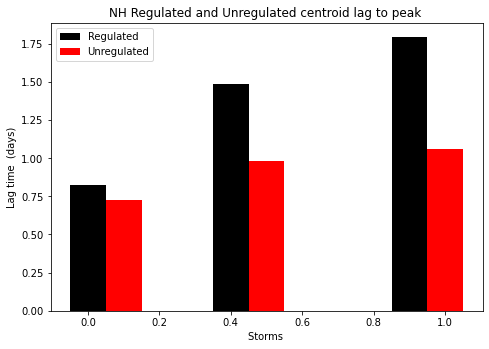

In [34]:
#%% Centroid lag to peak NH

X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Lag time  (days)')
ax.set_xlabel('Storms ')
ax.set_title('NH Regulated and Unregulated centroid lag to peak ')
ax.bar(X + 0.00, dfstorm.iloc[0,-1], color = 'k', width = 0.1, label='Regulated')
ax.bar(X + 0.1, dfstorm2.iloc[0,-1], color = 'r', width = 0.1, label= 'Unregulated')
ax.bar(X + 0.4, dfstorm.iloc[1,-1], color = 'k', width = 0.1)
ax.bar(X + .5, dfstorm2.iloc[1,-1], color = 'r', width = 0.1)
ax.bar(X + 0.9, dfstorm.iloc[2,-1], color = 'k', width = 0.1)
ax.bar(X + 1.0, dfstorm2.iloc[2,-1], color = 'r', width = 0.1)

ax.legend(loc='best')


Figure 6. New Hampshire regulated and unregulated precipitation centroid lag to peak time. 

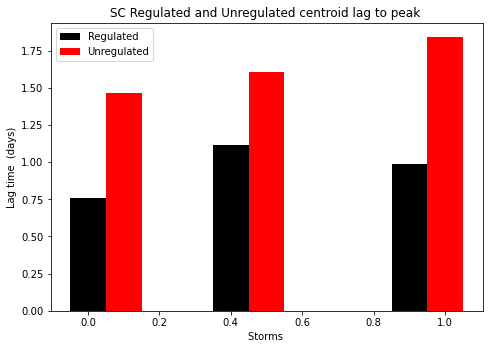

In [35]:
#%% Centroid lag to peak SC

X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Lag time  (days)')
ax.set_xlabel('Storms ')
ax.set_title('SC Regulated and Unregulated centroid lag to peak ')
ax.bar(X + 0.00, dfstorm4.iloc[0,-1], color = 'k', width = 0.1, label='Regulated')
ax.bar(X + 0.1, dfstorm3.iloc[0,-1], color = 'r', width = 0.1, label= 'Unregulated')
ax.bar(X + 0.4, dfstorm4.iloc[1,-1], color = 'k', width = 0.1)
ax.bar(X + .5, dfstorm3.iloc[1,-1], color = 'r', width = 0.1)
ax.bar(X + 0.9, dfstorm4.iloc[2,-1], color = 'k', width = 0.1)
ax.bar(X + 1.0, dfstorm3.iloc[2,-1], color = 'r', width = 0.1)

ax.legend(loc='best')



Figure 7. South Carolina regulated and unregulated precipitation centroid lag to peak time. 

### Discussion

The results of this study emphasize the major influence that river regulation has on flood frequency. Regardless of land use type, hydrologic soil group or mean basin slope, rivers that had regulation had significantly smaller peak annual discharge (figure3). 


Hydrologic soil groups differed drastically between the New Hampshire watersheds and the South Carolina watersheds, the soil types were very similar between each state's corresponding regulated and unregulated sites. It was surprising to see the NH regulated site have significantly smaller floods then all of the other sites despite having a relatively high concentration of slow and very slow infiltrating soil groups (figure2). In regards to land use most of the watersheds had similar landuse to their corresponding regulated or unregulated site.


The New Hampshire watersheds are located in very rural areas containing vast forests which make up more than 80% of each  watershed's land use . However the South Carolina sites were located in more urban areas, with the Reedy River watershed comprising 38% urban areas and only 40% forest (figure1). Although the SC sites tended to be in more urban areas and the NH sites in more rural areas, the Reedy River site did have over 20% more urban areas then the regulated Saluda river, which possibly could have led to the increase in peak annual discharges. 


Mean basin slope was also derived for each of the watersheds to see if it influenced flood frequency. Whereas mean basin slope size didn’t seem to influence the magnitude and frequency of floods, it did seem to affect centroid lag to peak times. It has long been known that watershed slope and length are the two biggest factors in lag to peak times.(Askew 1970). Both the NH regulated site and South Carolina unregulated sites had significantly higher slopes then their counterpart.These large differences in mean basin slopes are most likely the reason the centroid lag to peak times are longer for the regulated NH site and the unregulated SC site (figure 7)


While there are many other factors that contribute to high peak discharges in rivers  that were analyzed such as soil type,land use classification and basin average slope,it was clear that regulation had the most influence on flood size. The regulation of both the Connecticut River and Saluda Rivers has led to a substantial decrease in flood size and flood frequency (figure3 ).The correlation  between flood size and regulation was further explored through plotting both regulated and unregulated discharges.All six storms that were plotted had higher unregulated discharges then regulated discharges( figure 6). A number of studies have also found that dams on average reduce peak annual discharge by up to 90% and decrease the daily discharges by up to 60% (Graf 2006).While regulated sites had less discharge then unregulated sites, the study could be improved by creating a more specific metric then “regulated or not regulated”, such as number of dams or even as specific as reservoir storage capacity. Previous studies using reservoir storage capacity as a metric instead of regulation  found that as water  storage increases mean annual peak discharges decrease(Asquith 2001). 



### Conclusion: 

This study investigated how regulation in rivers affect flood frequency ,total discharge between storm events and centroid lag to peak times. Floods regulated with dams such as the NH site experience a greater centroid to lag time potentially due to water being slowed by the dams along the Connecticut River. However the mean basin slope seemed to be more linked to the centroid lag  to peak times across both the NH and SC sites.  All six of the regulated storms analyzed had smaller total discharges and lower peak discharges then their corresponding unregulated gauge. The regulated annual peak discharges being lower than the unregulated peak discharges across all exceedance probabilities reinforce the idea that regulation helps  absorb small flood events and significantly reduce larger events. Despite the peak annual discharges at the regulated site being less than the unregulated sites across all exceedance probabilities,there are still many more factors to consider when comparing across these diverse groups of rivers. Due to the relatively small sample size of four watersheds, more data is needed in order to draw any solid conclusions from this study. 


Literature Cited 

Asquith, William. (2001). Effects of Regulation on L-Moments of Annual Peak Streamflow in Texas.

Askew, A.J. 1970(b). Variation in lag time for natural catchments. Journal of the
Hydraulics Division. Proceedings of the American Society of Civil Engineers.
Vol. 96, HY2, pp. 317-329.

Ayalew, T. B., Krajewski, W. F., and Mantilla, R. (2013). “Exploring the effect of reservoir storage on peak discharge frequency.” J. Hydrol.Eng., 10.1061/(ASCE)HE.1943-5584.0000721, 1697–1708.

Rood, Stewart & Goater, Lori & Mahoney, John & Pearce, Cheryl & Smith, Derald. (2007). Floods, fire, and ice: disturbance ecology of riparian cottonwoods. Canadian Journal of Botany. 85. 1019-1032. 10.1139/B07-073.

William L. Graf,Downstream hydrologic and geomorphic effects of large dams on American rivers,Geomorphology,Volume 79, Issues 3–4,2006,Pages 336-360,ISSN 0169-555X
